# Flow Analysis

In this notebook I want to create something that will read all of the files that we have created and make a dataframe that makes flow analysis simple.

### To Do
- [x] Think there is a dupliacte node at 93 as 93 + 0 -> moved to the 1000 format
- [ ] Add in Bipartite and explore data


### Folder  Structure

All data needs to be in the data folder

* Bipartite
* Monopartite
* Extinction

Also excluded bipartite as we need all nodes to have the same meaning

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.listdir('data')


['Extinction',
 'Original_data',
 'Bipartite',
 'Monopartite',
 '.ipynb_checkpoints']

## Fetch all network files

In [5]:
def get_all_files(path):
    files = []
    for dirpath, _, filenames in os.walk(path):
        for f in filenames:
            files.append(os.path.abspath(os.path.join(dirpath, f)))
    return files

all_files = get_all_files('data') #Get all files
all_files= [f for f in all_files if f.find('Original_data')==-1] #Filter out input excel and matrix
all_files= [f for f in all_files if f.find('read')==-1] #filter readme
all_files

['/content/data/Extinction/rm_pol1622_freq_thr_10',
 '/content/data/Extinction/rm_plant0_freq_thr_10',
 '/content/data/Extinction/rm_pol1210_freq_thr_10',
 '/content/data/Extinction/rm_pol1436_num_freq_thr_0',
 '/content/data/Extinction/rm_pol1322_freq_thr_15',
 '/content/data/Extinction/rm_pol1671_freq_thr_15',
 '/content/data/Extinction/rm_pol1679_num_freq_thr_0',
 '/content/data/Extinction/rm_pol1147_freq_thr_5',
 '/content/data/Extinction/rm_plant6_freq_thr_5',
 '/content/data/Extinction/rm_pol1256_num_freq_thr_0',
 '/content/data/Extinction/rm_plant2_freq_thr_10',
 '/content/data/Extinction/rm_pol1147_freq_thr_10',
 '/content/data/Extinction/rm_plant72_num_freq_thr_0',
 '/content/data/Extinction/rm_pol1622_freq_thr_5',
 '/content/data/Extinction/rm_plant4_freq_thr_10',
 '/content/data/Extinction/rm_plant2_num_freq_thr_1',
 '/content/data/Extinction/rm_pol1083_num_freq_thr_1',
 '/content/data/Extinction/rm_plant64_num_freq_thr_1',
 '/content/data/Extinction/rm_plant15_freq_thr_5',


## Functions to run infomap and store inputs in dataframe

In [90]:
import re

def get_thres_f(path):
    thres_pos = path.find('freq_thr_')
    return path[thres_pos + len('freq_thr_'):]

def get_map_type(path):
    path=path.lower()
    out_type ='NA'
    map_type = ['bipartite', 'monopartite','extinction']
    for t in map_type:
        if path.find(t)!=-1: out_type = t
    return out_type

#just fetches the next number after the search match
def get_dropped(path, drop_key='rm_plant'):
    rm_out= 'NA'
    rm = path.find(drop_key)
    if rm != -1:
        rm_out=int(re.search(r'\d+', path[rm+len(drop_key):]).group())
    return rm_out

def run_infomap(path):
    from infomap import Infomap
    im=Infomap(silent=True)
    im.readInputData(path)
    im.run()

    df_ = im.get_dataframe()
    df_['thres_freq']= get_thres_f(path)
    df_['type'] = get_map_type(path)
    df_['rm_plant'] = get_dropped(path)
    df_['rm_poll'] = get_dropped(path, drop_key='rm_pol')
    return df_

In [92]:
run_infomap(all_files[0])

,path,flow,name,node_id,thres_freq,type,rm_plant,rm_poll
0,"(1, 1)",0.192935,2,2,10,extinction,NA,1622
1,"(1, 2)",0.096014,1322,1322,10,extinction,NA,1622
2,"(1, 3)",0.032609,1050,1050,10,extinction,NA,1622
3,"(1, 4)",0.023551,1414,1414,10,extinction,NA,1622
4,"(1, 5)",0.017210,1219,1219,10,extinction,NA,1622
5,"(1, 6)",0.012681,1185,1185,10,extinction,NA,1622
6,"(1, 7)",0.010870,1316,1316,10,extinction,NA,1622
7,"(2, 1, 1)",0.064312,3,3,10,extinction,NA,1622
8,"(2, 1, 2)",0.030797,1672,1672,10,extinction,NA,1622
9,"(2, 1, 3)",0.018116,1037,1037,10,extinction,NA,1622


In [31]:
os.listdir('data')

['Extinction',
 'Original_data',
 'Bipartite',
 'Monopartite',
 '.ipynb_checkpoints']

## Merge all the flow data for into one dataframe

In [93]:
i=0
for f in all_files:
  if i==0:
    df=run_infomap(f)
  else:
    df=pd.concat( [df,run_infomap(f)], ignore_index=True)


  i+=1
df

,path,flow,name,node_id,thres_freq,type,rm_plant,rm_poll
0,"(1, 1)",0.192935,2,2,10,extinction,NA,1622
1,"(1, 2)",0.096014,1322,1322,10,extinction,NA,1622
2,"(1, 3)",0.032609,1050,1050,10,extinction,NA,1622
3,"(1, 4)",0.023551,1414,1414,10,extinction,NA,1622
4,"(1, 5)",0.017210,1219,1219,10,extinction,NA,1622
...,...,...,...,...,...,...,...,...
12548,"(5, 1)",0.042821,1384,1384,15,monopartite,NA,NA
12549,"(5, 2)",0.023929,4,4,15,monopartite,NA,NA
12550,"(5, 3)",0.018892,5,5,15,monopartite,NA,NA
12551,"(6, 1)",0.025189,6,6,15,monopartite,NA,NA


### Identifying which models have max flow

In [33]:
df.sort_values('flow',  ascending=False)[1:10]

,path,flow,name,node_id,thres_freq,type,rm_plant,rm_poll
10081,"(1, 1)",0.427056,aemula,11,15,bipartite,NA,NA
8980,"(1, 1)",0.389234,aemula,11,13,bipartite,NA,NA
7947,"(1, 1)",0.385356,aemula,11,12,bipartite,NA,NA
7595,"(1, 1)",0.362319,aemula,11,11,bipartite,NA,NA
9200,"(1, 1)",0.349650,aemula,11,10,bipartite,NA,NA
9011,"(1, 1)",0.302115,aemula,11,9,bipartite,NA,NA
7893,"(1, 1)",0.300836,aemula,11,8,bipartite,NA,NA
7633,"(1, 1)",0.293421,aemula,11,7,bipartite,NA,NA
10009,"(1, 1)",0.265661,aemula,11,6,bipartite,NA,NA


In [34]:
df.groupby(['type'])['flow'].mean().to_frame()

,flow
type,
bipartite,0.006390
extinction,0.003292
monopartite,0.006520


### Node comparison

In [35]:
df[df['node_id']==4]

,path,flow,name,node_id,thres_freq,type,rm_plant,rm_poll
33,"(10, 1)",0.009964,4,4,10,extinction,NA,1622
71,"(11, 1)",0.009402,4,4,10,extinction,0,NA
107,"(10, 1)",0.009615,4,4,10,extinction,NA,1210
463,"(6, 24)",0.000212,4,4,0,extinction,NA,1436
880,"(5, 2)",0.032646,4,4,15,extinction,NA,1322
894,"(4, 2)",0.026316,4,4,15,extinction,NA,1671
1203,"(5, 24)",0.000209,4,4,0,extinction,NA,1679
1679,"(1, 3, 1)",0.043668,4,4,5,extinction,NA,1147
1763,"(4, 1)",0.043011,4,4,5,extinction,6,NA
2068,"(4, 24)",0.000209,4,4,0,extinction,NA,1256


In [46]:
grouped = df.groupby(['node_id', 'type'])['flow'].mean().unstack()
df_mean = grouped.reset_index()
df_mean

type,node_id,bipartite,extinction,monopartite
0,0,0.003808,0.040656,0.069445
1,1,0.000836,0.030713,0.039436
2,2,0.000836,0.067136,0.055578
3,3,0.000836,0.034567,0.040391
4,4,0.000418,0.017718,0.038640
...,...,...,...,...
768,1675,0.000000,0.000628,0.001439
769,1676,0.000000,0.000209,0.000209
770,1677,0.000000,0.000209,0.000209
771,1678,0.000000,0.000209,0.000209


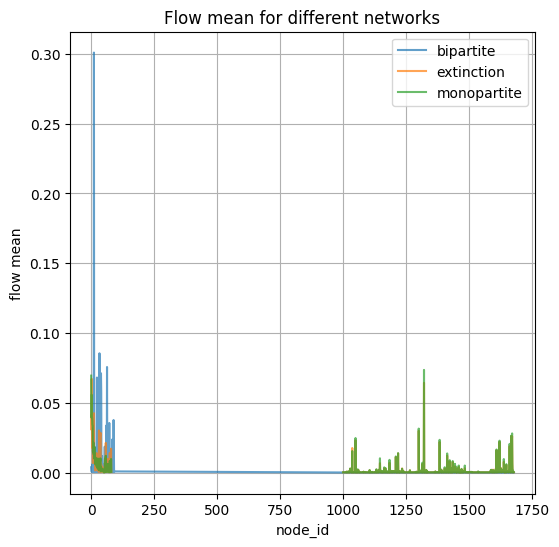

In [65]:
mean_bi = df_mean['bipartite'].mean()
median_bi = df_mean['bipartite'].median()
std_dev_bi = df_mean['bipartite'].std()

mean_ext = df_mean['extinction'].mean()
median_ext = df_mean['extinction'].median()
std_dev_ext = df_mean['extinction'].std()

mean_mon = df_mean['monopartite'].mean()
median_mon = df_mean['monopartite'].median()
std_dev_mon = df_mean['monopartite'].std()

plt.figure(figsize=(6, 6))
plt.plot(df_mean['node_id'], df_mean['bipartite'], label='bipartite',alpha=0.7)
plt.plot(df_mean['node_id'], df_mean['extinction'], label='extinction',alpha=0.7)
plt.plot(df_mean['node_id'], df_mean['monopartite'], label='monopartite',alpha=0.7)
plt.xlabel('node_id')
plt.ylabel('flow mean')
plt.title('Flow mean for different networks')
plt.legend()
plt.grid(True)
plt.show()

# Comparing codelengths, levels and leaf modules.
To-do: add a plot for extinction.

In [91]:
#not to intervene with the other function, for storing codelengths, levels, modules
def run_im(path):
  from infomap import Infomap
  im=Infomap(silent=True)
  im.readInputData(path)
  im.run()
  codelength = im.codelengths
  levels = im.max_depth
  modules = im.num_leaf_modules
  return codelength, levels, modules

In [96]:
codelengths_bi= []
levels_bi = []
modules_bi = []
codelengths_ext= []
levels_ext = []
modules_ext = []
codelengths_mon= []
levels_mon = []
modules_mon = []
for f in all_files:
  cdl, lvls, mdls = run_im(f)
  if(get_map_type(f)== 'bipartite'):
    codelengths_bi.append(cdl)
    levels_bi.append(lvls)
    modules_bi.append(mdls)
  elif(get_map_type(f)== 'extinction'):
    codelengths_ext.append(cdl)
    levels_ext.append(lvls)
    modules_ext.append(mdls)
  else:
    codelengths_mon.append(cdl)
    levels_mon.append(lvls)
    modules_mon.append(mdls)

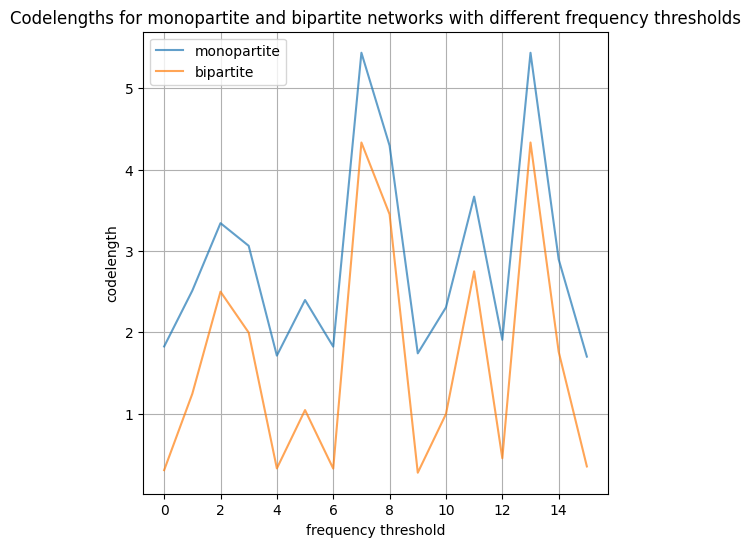

In [104]:
plt.figure(figsize=(6, 6))
plt.plot(codelengths_mon, label='monopartite',alpha=0.7)
plt.plot(codelengths_bi, label='bipartite',alpha=0.7)
plt.xlabel('frequency threshold')
plt.ylabel('codelength')
plt.title('Codelengths for monopartite and bipartite networks with different frequency thresholds')
plt.legend()
plt.grid(True)
plt.show()

## Syntax Transfroms: Only run if needed

To build a comparible dataframe all of the files need to be in the same syntax we set the pollenators to start at 1000 so they are distinct from the plant nodes

In [ ]:
def update_pol_drop_path(path, start_pol): # changes the rm_pol information in file path
    rm_out= 'NA'
    drop_key='rm_pol'
    rm = path.find(drop_key)
    if rm != -1:
        old_num=int(re.search(r'\d+', path[rm+len(drop_key):]).group())
        if old_num<1000: #old format(added the number of pollenators)
            old_start_pol= 93
        else: #1000 added for visual ease
            old_start_pol= 1000
        rm_out=str(old_num-old_start_pol+start_pol)
        new_path = path[:rm]+drop_key+rm_out +path[rm+len(drop_key)+len(str(old_num)):]
        os.rename(path,new_path)

def reformat_poll(path, start_pol = 1000):
    with open(path, 'r') as file:
        out_list =[]
        for line in file:
            out_line = line
            columns=line.split(' ')
            if columns[0].isnumeric():
                if int(columns[0])>93:# leave the plant numbers unchanged start after them
                    if int(columns[0])<1000: #old format(added the number of pollenators)
                        old_start_pol= 93
                    else: #1000 added for visual ease
                        old_start_pol= 1000
                    columns[0]=str(int(columns[0])-old_start_pol+start_pol)
                    out_line= ' '.join(columns)
            out_list.append(out_line)
    with open(path, 'w') as file:
        for line in out_list:
            file.write(line)
    update_pol_drop_path(path, start_pol)

In [ ]:
for file in all_files:
    reformat_poll(file)